# Noise Suppression

* Author: Johannes Maucher
* Last Update: 03.02.2021

From [Wikipedia](https://en.wikipedia.org/wiki/Image_noise):

*Image noise is random variation of brightness or color information in images, and is usually an aspect of electronic noise. It can be produced by the image sensor and circuitry of a scanner or digital camera. Image noise can also originate in film grain and in the unavoidable shot noise of an ideal photon detector. Image noise is an undesirable by-product of image capture that obscures the desired information.*

Often image noise is modelled as **Gaussian**, additive, independent at each pixel, and independent of the signal intensity. The additive noise values are Gaussian-distributed with zero mean.

Besides **Gaussian noise** other common noise models are 

- **Impulse Noise:** White pixels, that are randomly distributed over the image.
- **Salt and Pepper Noise:** White and black pixels, that are randomly distributed over the image.

Below, these three different noise types are visualized:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/noiseTypes.PNG" style="width:700px" align="center">

## Gaussian Noise

Independent of the noise type, it is assumed, that in the noise-free picture **nearby pixels** have similar values. Since Gaussian noise is assumed to be independent noisy pixels may vary effectively from their neighbours. This means that the assumed noise is **high-frequent**. From the [previous subsection](03LowPassFilter.ipynb) it is known, that high frequencies can be suppressed by applying a **low pass filters**, e.g. an average- or a Gaussian filter. As has been shown previously the Fourier Transform (spectrum) of a Gaussian function is again a Gaussian function with inverse variance. I.e. a smaller variance in time domain implies a larger bandwidth in the frequency domain and vice versa.

Below, first Gaussian noise is added to an image. Then the filtering of the noisy image with different filter-types and different bandwidths is demonstrated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters

from skimage import data, color, img_as_float
from sklearn.preprocessing import minmax_scale
import cv2
import warnings
warnings.filterwarnings("ignore")

Read and show original image:

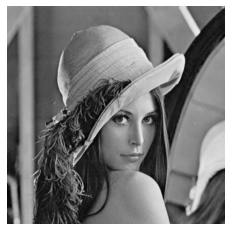

In [2]:
image = cv2.imread('../Data/lenaGrey.png',cv2.IMREAD_GRAYSCALE)
lenaGrey=image.copy()
plt.axis("off")
plt.imshow(image,cmap="gray")
plt.show()

Generate Gaussian noise ($\mu=0, \sigma=10$) and add it to the image:

In [3]:
mu=0
stddev=10
gaussNoise=np.floor(np.random.randn(image.shape[0],image.shape[1])*stddev+mu)
print(gaussNoise)
lenaGN=np.clip(image+gaussNoise,0,255).astype("uint8")

[[ 12. -16.  -1. ...  16.  -2.   2.]
 [  3.   3.   9. ...  12.  -8.   3.]
 [ -7.  -2.   4. ...   0. -19.   2.]
 ...
 [  4.  12.  10. ...  -5. -17.   5.]
 [-21.   5.  10. ... -11. -11.  14.]
 [ 14. -28.   6. ...  14.  -8.  -4.]]


For a better visualisation of the noise and the effects of the different filters on the noisy image we focus on a small region of the image. The coordinates of the region of interest are defined below:

In [4]:
ux=220 #lower x-bound 
ox=330 #upper x-bound
uy=120 #lower y-bound
oy=330 #upper y-bound

First we display this region for both, the original and the noisy image:

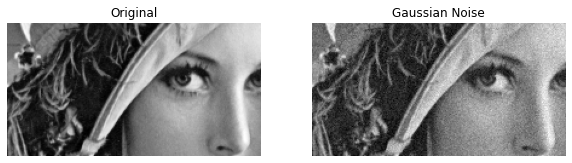

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 14))
ax[0].imshow(lenaGrey[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(lenaGN[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Gaussian Noise')
plt.show()

### Average- and Gaussian-Filter for Gaussian Noise suppression

Below, the result of filtering the noisy image with 

* Average-filters of different widths
* Gaussian-filters with different standard-deviations
* Non-Local-Means filters with different $h$  

is shown.

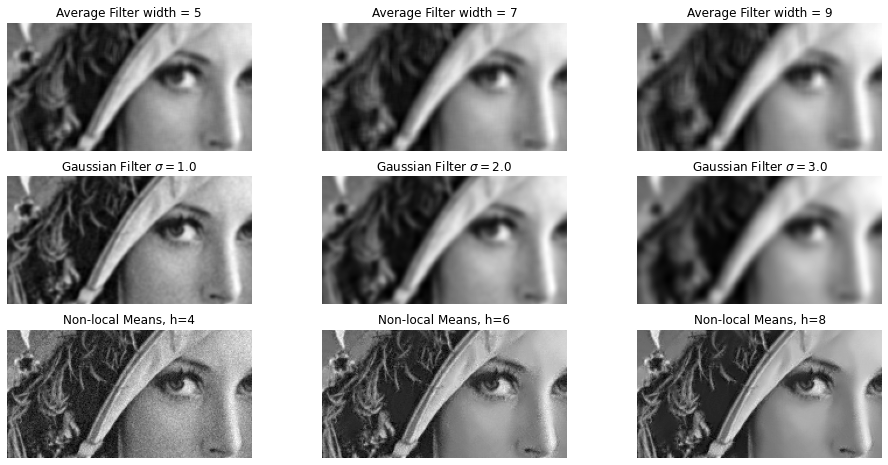

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))

ax[0, 0].imshow(filters.uniform_filter(lenaGN,5,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 0].axis('off')
ax[0, 0].set_title('Average Filter width = 5')

ax[0, 1].imshow(filters.uniform_filter(lenaGN,7,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 1].axis('off')
ax[0, 1].set_title('Average Filter width = 7')

ax[0, 2].imshow(filters.uniform_filter(lenaGN,9,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 2].axis('off')
ax[0, 2].set_title('Average Filter width = 9')


ax[1, 0].imshow(filters.gaussian_filter(lenaGN, sigma=1.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gaussian Filter $\sigma=1.0$')

ax[1, 1].imshow(filters.gaussian_filter(lenaGN, sigma=2.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gaussian Filter $\sigma=2.0$')

ax[1, 2].imshow(filters.gaussian_filter(lenaGN, sigma=3.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 2].axis('off')
ax[1, 2].set_title('Gaussian Filter $\sigma=3.0$')


ax[2, 0].imshow(cv2.fastNlMeansDenoising(lenaGN,h=4)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 0].axis('off')
ax[2, 0].set_title('Non-local Means, h=4')

ax[2, 1].imshow(cv2.fastNlMeansDenoising(lenaGN,h=8)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 1].axis('off')
ax[2, 1].set_title('Non-local Means, h=6')

ax[2, 2].imshow(cv2.fastNlMeansDenoising(lenaGN,h=10)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 2].axis('off')
ax[2, 2].set_title('Non-local Means, h=8')


plt.show()

Comparing the filter-outputs above yields, that the Non-Local-Means filter with $h=8$ yields the best result. This filter is described below:

### Non-Local-Means Filtering of Gaussian Noise

Average Filter and Gauss Filter both replace each pixel value by **(weighted) average of neighbouring pixel values**. In contrast to this concept a **Non-Local-Means-Filter (NLM)**: replaces each pixel value by the weighted average of pixel values in similar image regions.
		
For images with Gaussian noise we assume:

$$
P_{noise}=P_{true}+N_0,
$$

where $N_0$ is Gaussian distributed noise and $P_{true}$ is the image without noise.
		
The idea of NLM is that by adding many noisy versions of the same image-region, the noise-term will be averaged out and the result is the true image-region.

<img src="https://maucher.home.hdm-stuttgart.de/Pics/NLMnoiseReduction.PNG" style="width:900px" align="center">

*Image Source: [http://docs.opencv.org/trunk/d5/d69/tutorial_py_non_local_means.html](http://docs.opencv.org/trunk/d5/d69/tutorial\_py\_non\_local\_means.html)*


Further reading and demo:

- [Paper on NLM Denoising](http://www.ipol.im/pub/art/2011/bcm_nlm/revisions/2011-09-13/bcm_nlm.htm) 
- [Demo of NLP filtering](http://demo.ipol.im/demo/bcm_non_local_means_denoising/)
 
        
        

## Salt-and-Pepper Noise
Salt-and-pepper noise is another form of image noise. It is also known as impulse noise. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.

Below the original image is modified by two types of impulse-noise:

* salt and pepper: sparsely occuring pixels are either white or black
* salt: sparsely occuring pixels are white

The rate of noisy pixels is configured to be $R=0.01$.


In [7]:
image.shape

(512, 512)

In [8]:
R=0.01
num_noisy_pixel=int(np.floor(image.shape[0]*image.shape[0]*R))
noiseXpos=np.random.randint(0,image.shape[0],num_noisy_pixel)
noiseYpos=np.random.randint(0,image.shape[0],num_noisy_pixel)

In [9]:
lenaSalt=image.copy()
for a,b in zip(noiseXpos,noiseYpos):
    lenaSalt[a,b]=255

In [10]:
lenaSaltPepper=image.copy()
for a,b in zip(noiseXpos,noiseYpos):
    lenaSaltPepper[a,b]=(255 if a%2==0 else 0)

The original image and the images disturbed by salt- and salt-and-pepper-noise are shown:

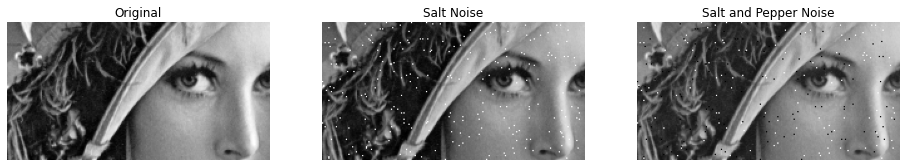

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
ax[0].imshow(lenaGrey[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(lenaSalt[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Salt Noise')

ax[2].imshow(lenaSaltPepper[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('Salt and Pepper Noise')
plt.show()

Next we apply an Average-, a Gaussian-, a NLM and a Median-filter on the image disturbed by salt-noise. The filter outputs are shown below.

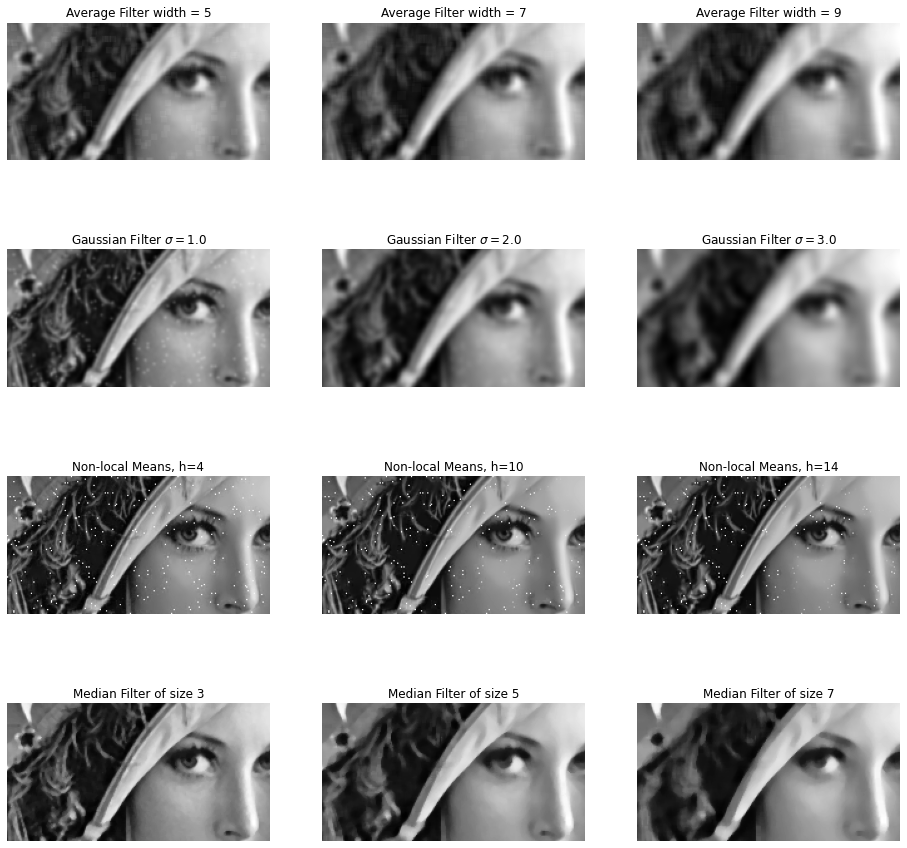

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))

ax[0, 0].imshow(filters.uniform_filter(lenaSalt,5,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 0].axis('off')
ax[0, 0].set_title('Average Filter width = 5')

ax[0, 1].imshow(filters.uniform_filter(lenaSalt,7,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 1].axis('off')
ax[0, 1].set_title('Average Filter width = 7')

ax[0, 2].imshow(filters.uniform_filter(lenaSalt,9,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[0, 2].axis('off')
ax[0, 2].set_title('Average Filter width = 9')


ax[1, 0].imshow(filters.gaussian_filter(lenaSalt, sigma=1.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 0].axis('off')
ax[1, 0].set_title('Gaussian Filter $\sigma=1.0$')

ax[1, 1].imshow(filters.gaussian_filter(lenaSalt, sigma=2.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 1].axis('off')
ax[1, 1].set_title('Gaussian Filter $\sigma=2.0$')

ax[1, 2].imshow(filters.gaussian_filter(lenaSalt, sigma=3.0,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[1, 2].axis('off')
ax[1, 2].set_title('Gaussian Filter $\sigma=3.0$')


ax[2, 0].imshow(cv2.fastNlMeansDenoising(lenaSalt,h=4)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 0].axis('off')
ax[2, 0].set_title('Non-local Means, h=4')

ax[2, 1].imshow(cv2.fastNlMeansDenoising(lenaSalt,h=8)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 1].axis('off')
ax[2, 1].set_title('Non-local Means, h=10')

ax[2, 2].imshow(cv2.fastNlMeansDenoising(lenaSalt,h=10)[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[2, 2].axis('off')
ax[2, 2].set_title('Non-local Means, h=14')

ax[3, 0].imshow(filters.median_filter(lenaSalt,size=3,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[3, 0].axis('off')
ax[3, 0].set_title('Median Filter of size 3')

ax[3, 1].imshow(filters.median_filter(lenaSalt,size=5,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[3, 1].axis('off')
ax[3, 1].set_title('Median Filter of size 5')

ax[3, 2].imshow(filters.median_filter(lenaSalt,size=7,output=np.float64, mode='nearest')[ux:ox,uy:oy],cmap=plt.cm.gray)
ax[3, 2].axis('off')
ax[3, 2].set_title('Median Filter of size 7')


plt.show()

As can be seen, the median-filter provides the best result in suppressing salt- (and pepper) noise. 